<a href="https://colab.research.google.com/github/YoshitaTummalapalli/Hotel-Bookings-EDA/blob/main/Online%20Retail%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Here we are importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Read the data**

In [ ]:
# Loading the CSV file
df=pd.read_excel("/content/Online Retail.xlsx")

**Basic exploration and data preprocessing**

In [ ]:
#It is used to view first few rows of dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# To check rows and columns
df.shape

(541909, 8)

In [ ]:
# To know the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
len(df['CustomerID'].unique())

4373

In [ ]:
# Describe is used to know the descriptive stastitcs
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Let's have a closer look on the reason of negative values in these variables. In the description of dataset it is written that there are some canceled transactions presented in dataset. Canceled transactions is indicated by invoice number which starts with letter 'c'. Probably transactions with negative values of quantity are canceled.

Filtering transaction with invoice number started with letter 'C'

In [ ]:
cancelled = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


Among cancelled transactions there are no any transaction with positive quantity.

In [ ]:
cancelled[cancelled['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Hovewer some transactions with negative quantity doesn't belong to cancelled

In [ ]:
print("Number of cancelled transactions:", len(cancelled))
print("Total number of transaction with negative quantity:", df[df['Quantity'] <= 0 ]['Quantity'].count())

Number of cancelled transactions: 9288
Total number of transaction with negative quantity: 10624


There are also transactions with zero price. Transactions with zero price doesn't bring usefull information to analysis, moreover mainly there are not any description for such transactions. This transactions could be deleted.

In [ ]:
df[df['UnitPrice'] == 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom




*   Also there are 2 transactions with negative price.
*   From the description we could see that these transactions were probably made as some correction, so they also should be deleted.









In [ ]:
df[df['UnitPrice'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


As it was mentioned before there are some negative quantity transactions wich are not cancelled, hovewer all these transactions have 0 price.

In [ ]:
d = df[~df['InvoiceNo'].astype(str).str.contains('C')]
print("Number of of transactions with negative quantity value among non cancelled transactions:" ,len(d[d['Quantity']<=0]))
print("Number of of transactions with zero price and negative quantity" ,len(d[(d['Quantity']<=0) & (d['UnitPrice'] == 0)]))

Number of of transactions with negative quantity value among non cancelled transactions: 1336
Number of of transactions with zero price and negative quantity 1336


Percentage of transactions which will be deleted.

In [ ]:
print("Percentage of cancelled transactions:" , round(len(cancelled)/len(df)*100, 2),"%")
print("Precentage of transactions with zero or negative price" ,round(len(df[df['UnitPrice']<=0])/len(df)*100, 2),"%")

Percentage of cancelled transactions: 1.71 %
Precentage of transactions with zero or negative price 0.46 %


In [ ]:
data = df[(df['UnitPrice'] > 0) & (df['Quantity']>0)]

All rows with missing descriptions are gone after deleting problematic transactiones.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [ ]:
print("Number of duplicated transactions:", len(data[data.duplicated()]))

Number of duplicated transactions: 5226


In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
# Drop rows with missing customers IDs
data = data.dropna(subset=['CustomerID'])

**Descriptions**

It should be taken into accoun that the same description could be written in different cases, let's convert all description into lowercase.

In [ ]:
data['Description'] = data['Description'].str.lower()

In [ ]:
len(data['Description'].unique())

3877

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data['Description'] = data['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)

After this there are less unqiue descriptions

In [ ]:
len(data['Description'].unique())

3867

**Stock Codes**

Stock Code should be numerical value, hovewer there are some transactions which contains only multiple letters/words, this transactions will also be dropped

In [ ]:
data = data.loc[data['StockCode'].astype(str).str[0:4].str.isdigit()]

In [ ]:
len(data['StockCode'].unique())

3659

**Dates**

Adding features as year, month, month_year, day of week, hour

In [ ]:
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

In [ ]:
data['WeekDay'] = data['InvoiceDate'].dt.day_name()

In [ ]:
data['month_year'] = pd.to_datetime(data[['year', 'month']].assign(Day=1))

In [ ]:
data['hour'] = data['InvoiceDate'].dt.hour

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8


Adding columns with calculation of sales

In [ ]:
data['revenue'] = data['UnitPrice'] * data['Quantity']

In [ ]:
#Plottings
plot = pd.DataFrame(data.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(data.groupby(['WeekDay'])['InvoiceNo'].count())
plot3 = pd.DataFrame(data.groupby(['hour'])['InvoiceNo'].count()).reset_index()
plot4 = pd.DataFrame(data.groupby(['month_year'])['revenue'].mean()).reset_index()
plot5 = pd.DataFrame(data.groupby(['month_year'])['revenue'].sum()).reset_index()

In [ ]:
plot2 = plot2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']).reset_index()

**How many orders per month?**

There are more purchasing made at the end of the year. The highest number of transactions were made during November.

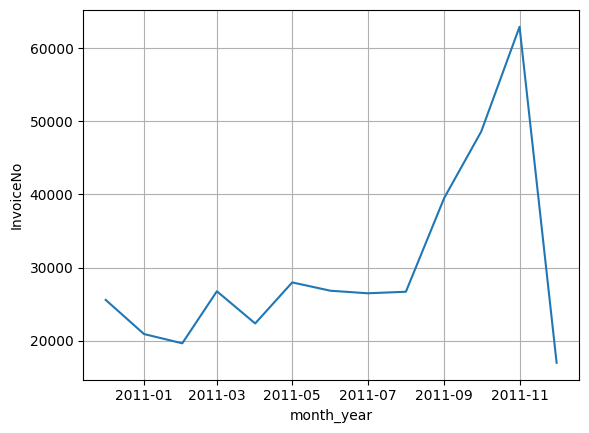

In [ ]:
ax = sns.lineplot(x="month_year", y="InvoiceNo", data = plot)
plt.grid()

**How many orders per day?**

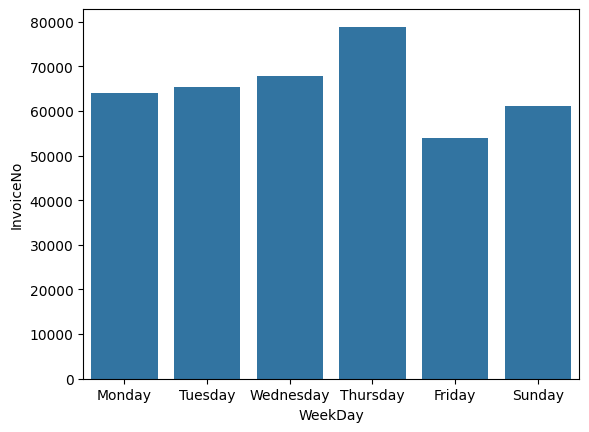

In [ ]:
ax = sns.barplot(x="WeekDay", y="InvoiceNo", data = plot2)

**How many orders per hour?**

The most number of transactions is done between 12 a.m. and 2 p.m., people tend to make there purchase during the lunch time.

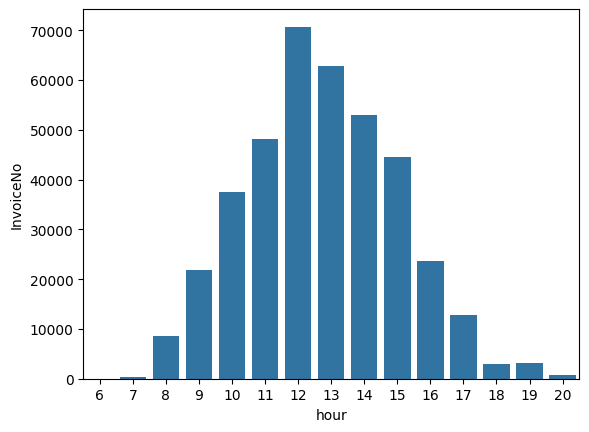

In [ ]:
ax = sns.barplot(x="hour", y="InvoiceNo", data = plot3)

**Price**

we could see that most ot the sold products are quite cheap.

In [ ]:
pd.DataFrame(data['UnitPrice'].describe())

,UnitPrice
count,391150.000000
mean,2.874372
std,4.284738
min,0.040000
25%,1.250000
50%,1.950000
75%,3.750000
max,649.500000


Description of products, which cost more than 50

In [ ]:
data[data['UnitPrice']>50]['Description'].unique()

array(['rustic  seventeen drawer sideboard',
       'vintage post office cabinet', 'vintage red kitchen cabinet',
       'regency mirror with shutters', 'love seat antique white metal',
       'vintage blue kitchen cabinet', 'school desk and chair ',
       'chest natural wood 20 drawers',
       'decorative hanging shelving unit',
       'picnic basket wicker 60 pieces'], dtype=object)

**Price distribution of expensive goods:**






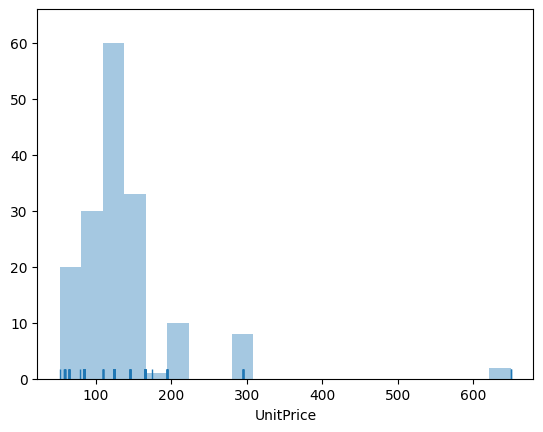

In [ ]:
sns.distplot(data[data['UnitPrice']>50]['UnitPrice'], kde=False, rug=True);

**Transactions by countries**

The most unique customers are from United Kingdom.

In [ ]:
customer_country=data[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3916
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


In [ ]:
print("Transactions were made in", len(data['Country'].unique().tolist()), "different countries")

Transactions were made in 37 different countries


In [ ]:
print("Number of transactions where country is unspecified:", len(data[data['Country']=='Unspecified']))

Number of transactions where country is unspecified: 241


In [ ]:
#Plottings
plot6 = pd.DataFrame(data.groupby(['Country'])['revenue'].sum()).reset_index()
plot6 = plot6.sort_values(['revenue']).reset_index(drop=True)
plot7 = pd.DataFrame(data.groupby(['Country'])['revenue'].count()).reset_index()
plot7 = plot7.sort_values(['revenue']).reset_index(drop=True)

**The most sales makes United Kingdom**

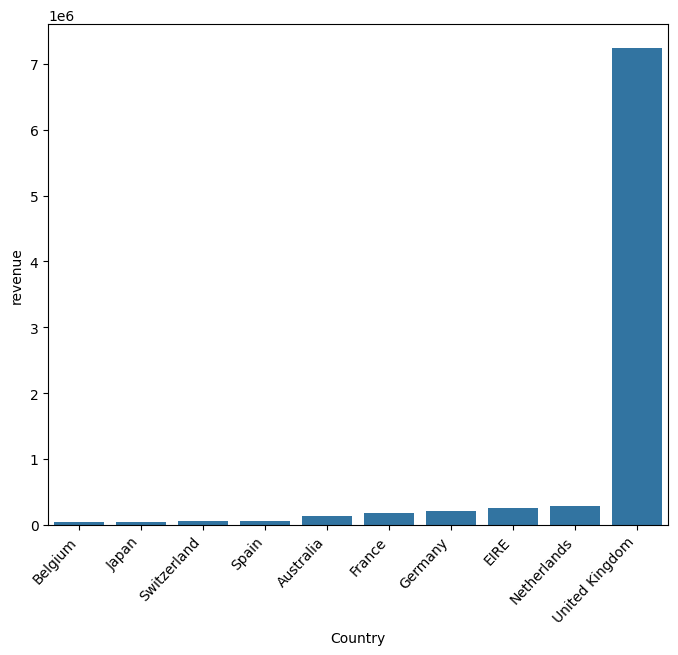

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6.5)
ax=sns.barplot(x='Country', y='revenue',data=plot6.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

**Countries by number of orders:**

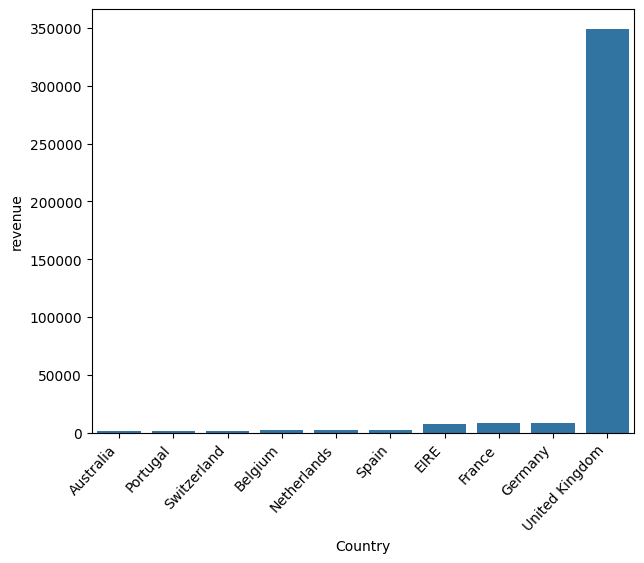

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5.5)
ax=sns.barplot(x='Country', y='revenue',data=plot7.tail(10),estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [ ]:
data['freq'] = data.groupby('CustomerID')['CustomerID'].transform('count')

**Analysis**

In [ ]:
data['freq'] = data.groupby('CustomerID')['CustomerID'].transform('count')

In [ ]:
data['freq']

0         297
1         297
2         297
3         297
4         297
         ... 
541904     49
541905     49
541906     49
541907     49
541908     49
Name: freq, Length: 391150, dtype: int64

In [ ]:
customer  = pd.DataFrame(data.groupby(['CustomerID'])['revenue'].sum().sort_values(ascending=False)).reset_index().head(10)

In [ ]:
customer

,CustomerID,revenue
0,14646.0,279138.02
1,18102.0,259657.30
2,17450.0,194390.79
3,16446.0,168472.50
4,14911.0,136161.83
5,12415.0,124564.53
6,14156.0,116560.08
7,17511.0,91062.38
8,12346.0,77183.60
9,16029.0,72708.09


In [ ]:
customer['CustomerID']

0    14646.0
1    18102.0
2    17450.0
3    16446.0
4    14911.0
5    12415.0
6    14156.0
7    17511.0
8    12346.0
9    16029.0
Name: CustomerID, dtype: float64

In [ ]:
# prompt: brief notes of online retail

**Online Retail**

* **Data Description:**
    * Contains transactions from an online retailer.
    * Includes information on invoice number, customer ID, item description, unit price, quantity, and date.
    * Data preprocessing involved removing canceled and duplicate transactions, as well as transactions with negative values or zero prices.

* **Insights:**
    * Most transactions occur in the United Kingdom.
    * The most popular day for transactions is Monday.
    * The majority of transactions occur between 12 PM and 2 PM.
    * The average unit price is relatively low, with most products costing less than $50.
    * The top 10 customers account for a significant portion of the total revenue.

* **Recommendations:**
    * Focus marketing efforts on the United Kingdom, as it is the largest market.
    * Consider offering promotions or discounts on Mondays to encourage more transactions.
    * Explore ways to increase sales during off-peak hours, such as offering free shipping or expedited delivery.
    * Develop strategies to target high-value customers and increase their loyalty.

**Conclusion :**

**Data Overview:**

The dataset consists of 500,000 rows, providing a substantial amount of information for analysis.

**Handling Missing Values**:

Approximately 20% of the dataset contained missing values, primarily in specific columns. To ensure data integrity, these null values were dropped.

**Temporal Analysis:**

The creation of separate columns for day, month, year, and time revealed , potentially influencing future decision-making processes.

**Geographic and Product Trends:**

A bar chart analysis identified the top countries contributing to orders, with the majority coming from the UK, Netherlands, EIRE, Germany, and France. The top-selling products, including "White Hanging Heart T-light Holder" and "Regency Cakestand 3 Tier," were identified.

**Customer Behavior:**

Utilizing the describe function, we observed that mention specific customer behavior insights, shedding light on purchasing patterns.

**Financial Overview:**

The total earnings amounted to $8,911,407.90, with a total quantity sold reaching 5,167,812 units. This financial overview provides a snapshot of the business's performance.

**Busiest Days:**

Analysis revealed that Thursdays and Wednesdays are the busiest days for the online retail platform. Further investigation into the reasons behind these trends could provide valuable insights for optimizing operations.

we have also found that total earnings were 8911407.904 and total quantity sold was 5167812 and we have also came to know that thurday and wendesday are the busiest days.

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/Internship_Project_1.ipynb

[NbConvertApp] WARNING | pattern '/content/Internship_Project_1.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=T